# Making Networks

## Stacking

- Parallel Stacking
- Sequential Stacking

## Nomenclature

- 5-3-4-1 Network

## Feed-Forward Network

- One-directional Processing
 
## Fully-Connected Network

- Output from a neuron goes to all neurons in the next layer

# Gradient Descent

1. Initialization: Randomize $w$, $b$
2. Forward Propagation: Calculate Output (Cost) using these values
3. Estimate error using the Loss function
4. Backward Propagation: Find the values and update for $w$ and $b$ that can reduce the error
5. Repeat from step 2 until the error is acceptable

## Cross-Entropy error function
$$ H(y, y') = -y \log(y') - (1 - y) \log(1 - y') $$

## Back Propagation
$$ \begin{align*}
    w &= w - \alpha \Delta w \\
    b &= b - \alpha \Delta b
  \end{align*} $$
  
  
## Common Activation Functions

- Step
- Sigmoid $\sigma(z) = \frac{1}{1 + e^{-z}}$
- tanh
- ReLU $\max(0, z)$

## Multi-class Classification
- Softmax = 

# Gradient Descent
- Gradient Descent: forward and backward propagation for full training set
- Stockastic Gradient Descent: forward and backward propagation per training record
- Mini-batch Stochastic Gradient Descent: small-batch at a time

# Epoch: one cycle through the whole training set


# Hyperparameters

## Classifications
| Hyperparameters                  | Binary Classification | Multi-label binary classification | Multi-class classifiction |
|----------------------------------|-----------------------|-----------------------------------|--------------------------|
| No. of hidden layers             | depends on question, typically 1 - 5 |
| Hidden Activation function       | ReLU |
| Output dimensions                | 1 | No. of labels | No. of class |
| Output layer Activation function | Logistic | Logistic | Softmax |
| Loss Function                    | Cross-Entropy |

## Regressions
| Hyperparameters                  | Regression |
|----------------------------------|-----------------------|
| No. of hidden layers             | depends on question, typically 1 - 5 |
| No. of neurons per hidden layer  | depends on question, typically 10 - 100 |
| Hidden Activation function       | ReLU |
| Output dimensions                | 1 |
| Output layer Activation function | None |
| Loss Function                    | Mean-Squared Error (MSE) |

# Framework vs Architecture

| Level          | Library                              |
|----------------|--------------------------------------|
| Model Level    | Keras                                |
| Lower Level    | Tensorflow / Theano / CNTK ...       |
| Driver Level   | GPU: CUDA / cuDNN, CPU: BLAS / Eigen |

# Image Classifier with ANN
## Dataset: Fasion MNIST


In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [5]:
import tensorflow as tf
from tensorflow import keras


In [6]:
tf.__version__

'2.6.0'

In [7]:
keras.__version__

'2.6.0'

In [12]:
fashion_mnist = keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

class_names = [
    "Top",
    "Trousers",
    "Pullover",
    "Dress",
    "Coat",
    "Sandals",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle Boots",
]

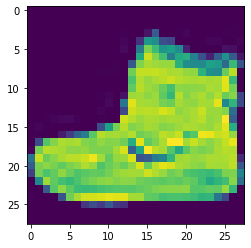

In [9]:
plt.imshow(X_train[0])

In [13]:
y_train[0], class_names[y_train[0]]

(9, 'Ankle Boots')

# Data Normalization

In [14]:
X_train, X_test = X_train / 255, X_test / 255

In [31]:
from sklearn.model_selection import train_test_split
validation_size = 5000 / 60000
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = validation_size, random_state = 42)

In [17]:
np.random.seed(42)
tf.random.set_seed(42)

# Image Classification via ANN

- Input: (n, 28, 28, 1)
- Hidden Layer x 2 with ReLU
- Output Layer with Softmax
- 10 categories

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(300, activation="relu"),
    Dense(100, activation="relu"),
    Dense(10, activation="softmax"),
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


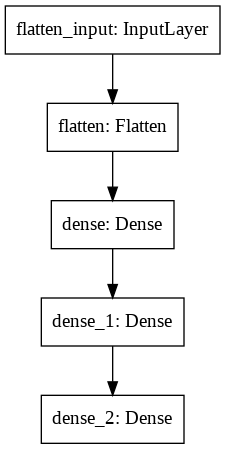

In [20]:
import pydot
keras.utils.plot_model(model)

In [21]:
weight, bias = model.layers[1].get_weights()

In [22]:
weight

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [24]:
weight.shape

(784, 300)

In [23]:
bias

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [25]:
# Compile Model
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = "sgd",
              metrics = ["accuracy"])

In [32]:
model_history = model.fit(X_train, y_train,
                          epochs = 30,
                          validation_data = (X_valid, y_valid))

Epoch 1/30
1103/1103 [==============================] - 4s 3ms/step - loss: 0.2352 - accuracy: 0.9140 - val_loss: 0.2361 - val_accuracy: 0.9149
Epoch 2/30
1103/1103 [==============================] - 3s 3ms/step - loss: 0.2293 - accuracy: 0.9177 - val_loss: 0.2724 - val_accuracy: 0.8969
Epoch 3/30
1103/1103 [==============================] - 3s 3ms/step - loss: 0.2268 - accuracy: 0.9173 - val_loss: 0.2332 - val_accuracy: 0.9212
Epoch 4/30
1103/1103 [==============================] - 3s 3ms/step - loss: 0.2232 - accuracy: 0.9207 - val_loss: 0.2526 - val_accuracy: 0.9121
Epoch 5/30
1103/1103 [==============================] - 3s 3ms/step - loss: 0.2195 - accuracy: 0.9213 - val_loss: 0.2511 - val_accuracy: 0.9084
Epoch 6/30
1103/1103 [==============================] - 3s 3ms/step - loss: 0.2158 - accuracy: 0.9231 - val_loss: 0.2493 - val_accuracy: 0.9121
Epoch 7/30
1103/1103 [==============================] - 3s 3ms/step - loss: 0.2112 - accuracy: 0.9249 - val_loss: 0.2910 - val_accuracy:

In [33]:
model_history.params

{'epochs': 30, 'steps': 1103, 'verbose': 1}

In [34]:
model_history.history

{'accuracy': [0.9140007495880127,
  0.9176560640335083,
  0.9172877073287964,
  0.9207446575164795,
  0.9213396906852722,
  0.9230965375900269,
  0.9248533844947815,
  0.9244283437728882,
  0.9266101717948914,
  0.9276019334793091,
  0.9293587803840637,
  0.930662214756012,
  0.9305772185325623,
  0.9322206974029541,
  0.9329574108123779,
  0.9348559379577637,
  0.9366127252578735,
  0.9366977214813232,
  0.9388796091079712,
  0.9389929175376892,
  0.9393329620361328,
  0.9408064484596252,
  0.9412031173706055,
  0.943215012550354,
  0.9436683654785156,
  0.9445751309394836,
  0.9469836354255676,
  0.9477487206459045,
  0.9483721256256104,
  0.9481737613677979],
 'loss': [0.23517966270446777,
  0.22927087545394897,
  0.22679689526557922,
  0.2232147455215454,
  0.21946224570274353,
  0.21579059958457947,
  0.21122534573078156,
  0.20958508551120758,
  0.20573735237121582,
  0.20210272073745728,
  0.198783278465271,
  0.19502726197242737,
  0.19349254667758942,
  0.19066394865512848,
  

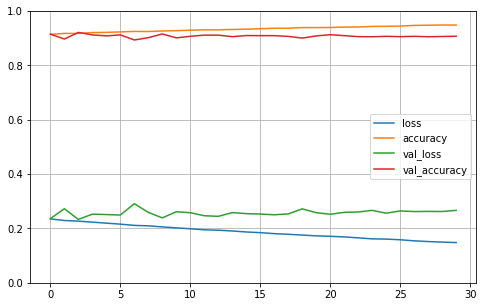

In [35]:
pd.DataFrame(model_history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


# Evaluating Model Performance

In [38]:
y_prob = model.predict(X_test)
y_prob.round(2)

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [40]:
y_pred = np.argmax(y_prob, axis = 1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [41]:
np.array(class_names)[y_pred]

array(['Ankle Boots', 'Pullover', 'Trousers', ..., 'Bag', 'Trousers',
       'Sandals'], dtype='<U11')

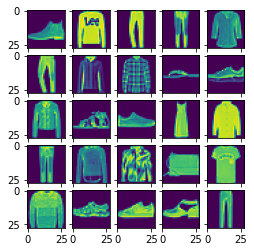

In [43]:
from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(figsize=(4., 4.))
grid = ImageGrid(fig, 111,
                 # creates 2x2 grid of axes
                 nrows_ncols = (5, 5),
                 # pad between axes in inch.
                 axes_pad = 0.1)

for i, (ax, X, y_expected, y_actual) in enumerate(zip(grid, X_test, y_test, y_pred)):
    # Iterating over the grid returns the Axes.
    ax.imshow(X)
    # ax.set_title(f"[{i}]: expected: {class_names[y_expected]}, actual: {class_names[y_actual]}, correct: {y_expected == y_actual}, P(E): {y_prob[i]}")

plt.show()

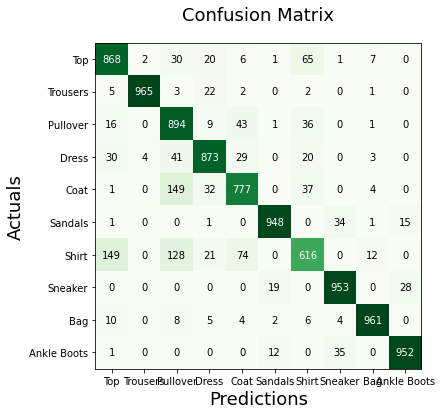

In [64]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)

from mlxtend.plotting import plot_confusion_matrix
 
fig, ax = plot_confusion_matrix(conf_mat=matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.xticks(list(range(len(class_names))), labels = class_names)
plt.yticks(list(range(len(class_names))), labels = class_names)
# plt.xticklabels(class_names, rotation='vertical', fontsize=18)
# plt.yticklabels(class_names, rotation='vertical', fontsize=18)

plt.show()